#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### About Dataset

In [2]:
df = pd.read_csv("C:\\Trash\\tvmarketing.csv")

print(df.head())

print(df.shape)

print(df.columns)

print(df.describe())

print(df.isnull().sum())

print(df.info())

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
(200, 2)
Index(['TV', 'Sales'], dtype='object')
               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000
TV       0
Sales    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB
None


#### Visualize the relationship in features and Using iloc to select input and output features

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


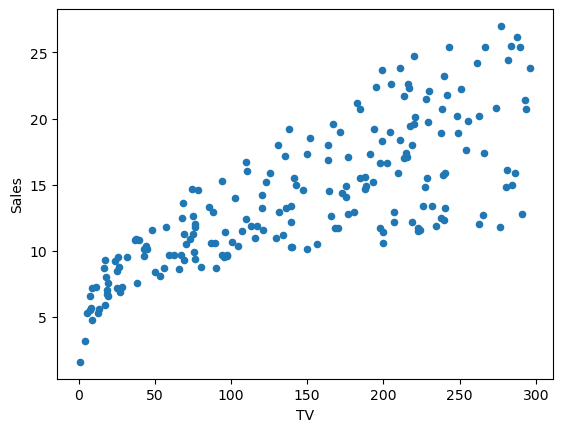

In [3]:
df.plot(x="TV", y='Sales', kind='scatter')

X = df.iloc[:,0]
print(X)

y = df.iloc[:,1]
print(y)

#### Splitting of dataset into Train and Test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(150,)
(50,)


#### Linear Regression model

In [5]:
lr = LinearRegression()

lr.fit(X_train.values.reshape(-1,1), y_train)

print("intercept : ",lr.intercept_)
print("Coeff : ",lr.coef_)

intercept :  7.248909283005855
Coeff :  [0.04614341]


#### Prediction of the Test set

In [6]:
y_pred = lr.predict(X_test.values.reshape(-1,1))

print("prediction : ",y_pred)

prediction :  [10.44203308  9.55607966 11.42027332 20.61665445 15.10251725  9.84216879
  7.65035693 18.32794143  8.34712238 16.36684661 19.30618167 11.27261442
 14.4749669  15.91464122 10.77426562 12.79534687 19.50459832  7.28120967
 10.69582183 17.09591245 20.51975329 13.72282936 15.32861994 13.32599606
  9.71758159 12.92916275 14.89025757 16.70830783 17.58503257  8.40710881
 10.37743231 16.42683304 20.20136378 18.40177088  7.85800226  8.111791
  9.99905637 15.59163737 10.40511836  8.40249447  8.95160102  8.70242662
 13.84280222 16.9205675  17.18819927 11.98783724  7.64574259  8.02873287
 13.04913561 12.07550971]


#### Visualization of the trained model

Text(0, 0.5, 'Sales')

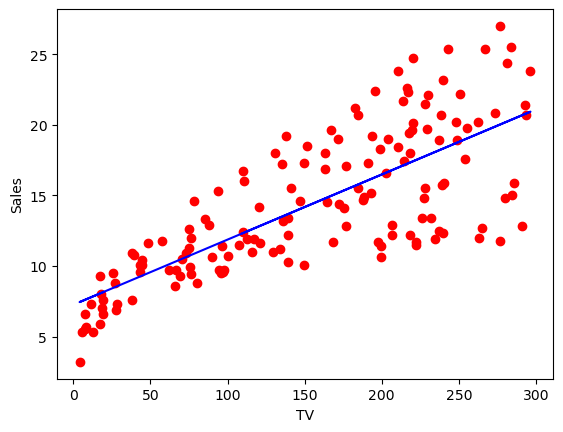

In [7]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, lr.predict(np.array(X_train).reshape(-1,1)), color="blue")
plt.xlabel("TV")
plt.ylabel("Sales")

#### Evaluation of the model: Mean Square Error

In [8]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error",mse)

r_squared = r2_score(y_test, y_pred)

print("R squared : ",r_squared)


Mean squared error 8.730248872947453
R squared :  0.6902574858002379


#### Visualization of Error & Prediction for a New Unseen Record


predicting new data
[13.70898634]


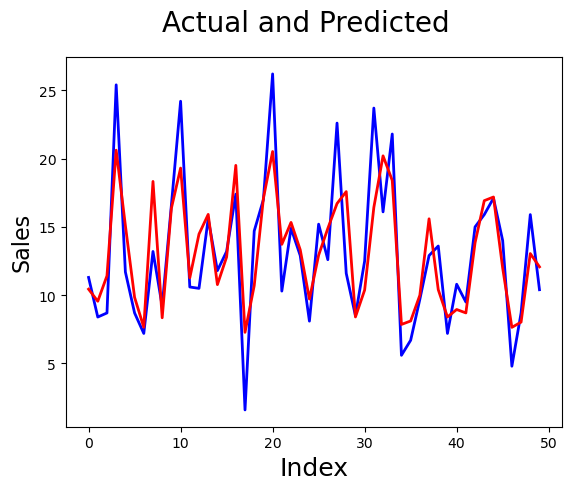

In [9]:
c = [i for i in range(len(y_test))]         # generating index 
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)            

new_rec = np.array([140])
print("predicting new data")

new_res = lr.predict(new_rec.reshape(-1, 1)) 
print(new_res)                                                                   